# Day 4

STILL on London tube, but we are into the business of making a travel planner, that calculates the shortest path between two arbitrary stations.

For this exercise, the graph class is pretty much the same, expect, the BFS and DFS facilities are missing, since they are not necessary.

## London Tube map

London's underground has considerable complexity, and navigating it is a challenge.

<img src="https://media.timeout.com/images/104710384/630/472/image.jpg" width=45%>
Let us download a dataset representing it (in it's 2014 state), and work with it as a graph!

But first, we have to define, what a graph is!

In [1]:
class GraphNode:
    ''' A node for the Graph class 
        representing the station name, geographical coordinates
        and list of immediate neighbors'''
    def __init__(self, station_id=None, name=None, x=None, y=None, neighbor_nodes=None):
        self.station_id = station_id
        self.name = name #as name implies
        self.x = x #longitude
        self.y = y #latitude
        self.neighbor_nodes = [] #the list pointing to the station's direct neighbors

    def __repr__(self):
        ''' Returns data instead of the GraphNode object's default printable representation
            This is just a nice method for a more "tidy" printout.'''
        return repr(self.name)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


class Graph:
    """The main container object for our task
       It contains as attributes a list of nodes, which in turn point to ech-other in ther respective
       neigbhbors attribute.
       Also, it exposes utilities for creating, manipulating and plotting the graph."""
    
    def __init__(self, stations_dataframe=None, edges_dataframe=None):
        """Runs when the node class is being instantiated.
           Optionally takes in two datafranes we have loaded from disc,
           For the stations data, it describes the individual graph nodes,
           and for the connections their edges."""
        
        self.nodes = []
        
        if stations_dataframe is not None:   
            self.add_nodes_from_dataframe(stations_dataframe)
            
            if edges_dataframe is not None:
                self.add_edges_from_dataframe(edges_dataframe)
                
        #Just here for pedagogical purposes to make aware, that in OOP, the operations of a method 
        #can have effect on the object-s state, hence the function return values can often be empty.
        return
    
    def add_nodes_from_dataframe(self, stations_dataframe):
        """Utility function for iteratin through a stations dataframe,
           and creating GraphNodes for each row in the input table."""
        
        for row_counter, row_data in stations_dataframe.iterrows():
            node = GraphNode(station_id=row_counter, name=row_data['name'], x=row_data['longitude'], y=row_data['latitude'])
            self.nodes.append(node)

        return

    def get_station_by_id(self, searched_id):
        """Getter function for retrieval of a node with a given station_id."""
        
        for node in self.nodes:
            if searched_id == node.station_id:
                return node
    # Note: we could potentially use a more efficient way here, if we could assume, that the index position
    # of the given node in the self.nodes list is always corresponding to it's station_id. Turns out to be, 
    # that somehow,
    # the station with the id of 189 is missing from London, so if we would implement it that way, 
    # we would run into nice indexing problems. 
    # For the time being, we stick with this rather ugly way of lookup
    # with O(n) complexity.

    def get_station_by_name(self, name):
        ''' Find node by name '''

        station_node = next(filter(lambda x: x.name == name,  self.nodes))
        return station_node
    # Note: equivalent of the previous for loops, just written in a more functional programming style.
    
    def add_edge_between_nodes(self, node1, node2):
        """Utility for adding a mutual relationship between two nodes"""
        
        if node2 not in node1.neighbor_nodes:
            node1.neighbor_nodes.append(node2)

        if node1 not in node2.neighbor_nodes:
            node2.neighbor_nodes.append(node1)        

        return

    
    def get_all_nodes(self):
        """As name implies, giving back the node list"""
        return self.nodes
    
    def add_edges_from_dataframe(self, edges_dataframe):
        """Utility function for processing the loaded connections dataframe.
           It iterates through connections, gets the appropriate nodes by id and connects them."""
        
        # Add neighbour information to nodes
        for row_counter, row_data in edges_dataframe.iterrows():
            # Get station name from the station ID
            station_1_nbr = row_data['station1']
            station_2_nbr = row_data['station2']
                      
            # Get node with the same id
            station_node_1 = self.get_station_by_id(station_1_nbr)
            station_node_2 = self.get_station_by_id(station_2_nbr)

            self.add_edge_between_nodes(station_node_1, station_node_2)

        return


    
    def plot(self, color='lightblue'):
        ''' Utility for the graph to plot stself.
            It depends on breadth_first_traversal to be implemented to run,
            and uses Seaborn for style and Matplotlib for plotting.'''
        
        # Plot settings
        sns.set(rc={'figure.figsize':(20,10)})
        sns.set_style("whitegrid")

        # Plot graph
        node_x = []
        node_y = []
        for node in self.nodes:
            # Save data for displaying node positions
            node_x.append(node.x)
            node_y.append(node.y)

            # Plot connections
            for nn in node.neighbor_nodes:
                 plt.plot([node.x, nn.x], [node.y, nn.y], c=color, lw=1)

        # Plot nodes
        plt.scatter(x=node_x, y=node_y, s=10)

# Downloading and checking data

In [3]:
#!wget https://raw.githubusercontent.com/nicola/tubemaps/master/datasets/london.lines.csv
#!wget https://raw.githubusercontent.com/nicola/tubemaps/master/datasets/london.stations.csv
#!wget https://raw.githubusercontent.com/nicola/tubemaps/master/datasets/london.connections.csv

In [4]:
# We use Pandas for the loading of the London tube dataset.
import pandas as pd

# This dataset is from https://github.com/nicola/tubemaps
# Last updated in 2014!
lines       = pd.read_csv('london.lines.csv', index_col=0)
stations    = pd.read_csv('london.stations.csv', index_col=0)
connections = pd.read_csv('london.connections.csv')

## Let's get a glimpse on the station coordinates!

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

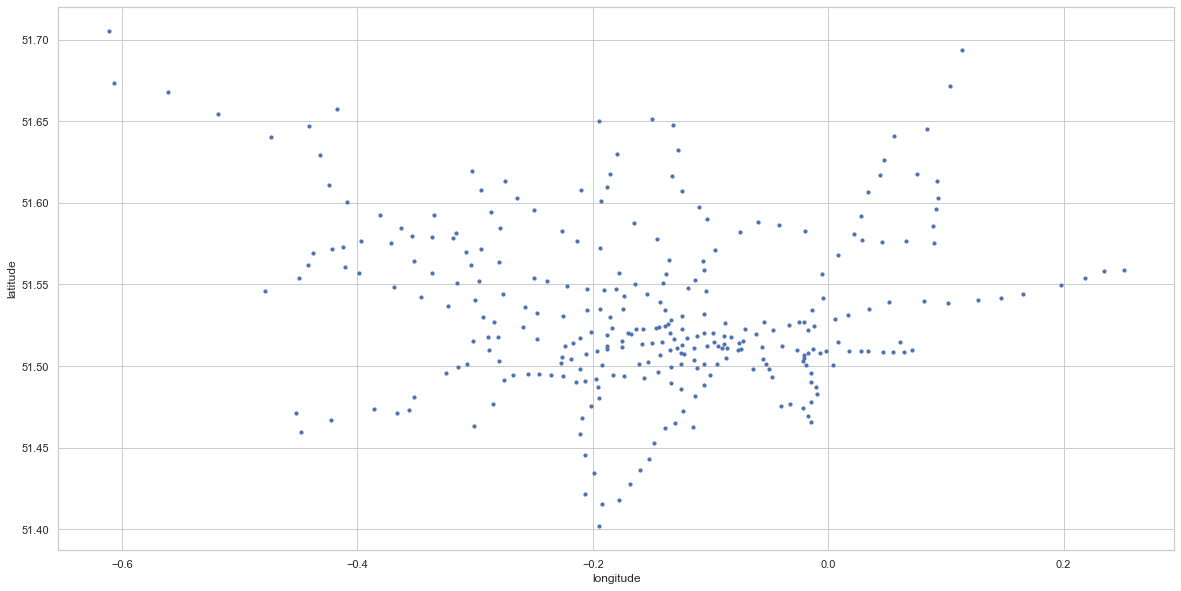

In [5]:
# Station position in classic map style(up - north, right - east)
sns.set(rc={'figure.figsize':(20,10)})
sns.set_style("whitegrid")
stations.plot.scatter(x='longitude', y='latitude', s=10)

## Let's use our Graph class to store the data

In [6]:
tube_graph = Graph(stations_dataframe=stations, edges_dataframe=connections)

In [7]:
# If you have trouble to see, what is what, just use:
tube_graph.get_station_by_id(11)

'Baker Street'

In [8]:
# or
tube_graph.get_station_by_name("Baker Street").neighbor_nodes

['Marylebone',
 "Regent's Park",
 'Edgware Road (C)',
 'Great Portland Street',
 'Bond Street',
 "St. John's Wood",
 'Finchley Road']

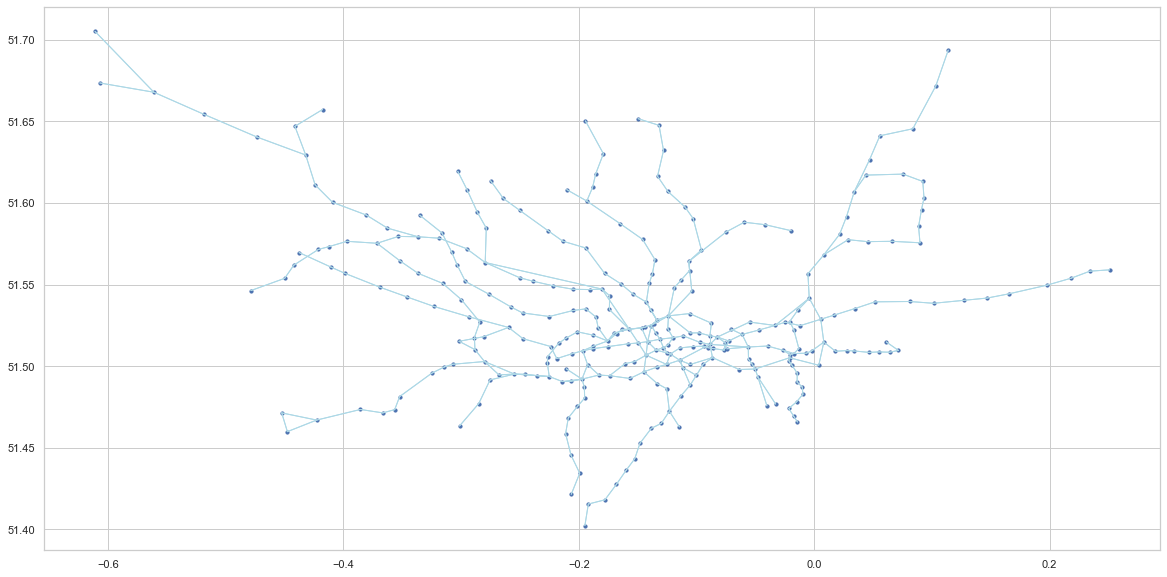

In [9]:
tube_graph.plot()

Just in case, manual sanity check, looking at the first connection, and then at the real Tube map of the appropriate line from [Wikipedia](https://upload.wikimedia.org/wikipedia/commons/thumb/7/77/Bakerloo_Line.svg/1100px-Bakerloo_Line.svg.png).

In [10]:
print(connections.head(1))

   station1  station2  line  time
0        11       163     1     1


In [11]:
tube_graph.get_station_by_id(11)

'Baker Street'

In [12]:
tube_graph.get_station_by_id(163)

'Marylebone'

In [13]:
print(lines)

                         name  colour  stripe
line                                         
1               Bakerloo Line  AE6017     NaN
3                 Circle Line  FFE02B     NaN
6     Hammersmith & City Line  F491A8     NaN
7                Jubilee Line  949699     NaN
11              Victoria Line  0A9CDA     NaN
2                Central Line  F15B2E     NaN
4               District Line  00A166     NaN
5            East London Line  FBAE34     NaN
8           Metropolitan Line  91005A     NaN
9               Northern Line  000000     NaN
10            Piccadilly Line  094FA3     NaN
12       Waterloo & City Line  88D0C4     NaN
13    Docklands Light Railway  00A77E  FFFFFF


<img src="http://drive.google.com/uc?export=view&id=1VENpIG1bkeEktN_AJNQqyD7Exr9-0Pj6" width=65%>

### Find shortest path between two station with A*
We know:
- Longitude and latitude values are not suitable for directly calculating distance.
- In reality the subway route between two station often not straight or level.
- You often have to walk some distance when switching lines.

For simplicity we will not consider these issues in our calculations.

In [14]:
import numpy as np

def distance(node_1, node_2):
    """ Euclidean Distance between two node's coordinates """
    return np.sqrt((node_1.x - node_2.x) ** 2 + (node_1.y - node_2.y) ** 2)

In [15]:
def argmin(x):
    """ _Helper function for returning the index of the lowest value in a list """
    return min(enumerate(x), key=lambda x:x[1])[0]

In [20]:
def a_star(graph, start_node_name, end_node_name):
    ''' Basic implementation of the A* algorithm '''
    # Initialize two variables holding the start and the end node
    # using the given input names and the Graph's facilities for getting nodes
    start_node = graph.get_station_by_name(start_node_name)
    end_node = graph.get_station_by_name(end_node_name)
    
    # Initialize helper variables
    # The first_path is for the time being is a list containing only the starting node
    first_path = [start_node]
    # The list of open paths for the time being only contains the first path
    open_path_list = [first_path]
    # And the list of path costs one zero entry
    open_path_cost_list = [0]
    
    # Until you have a path on the open list run the following steps
    # some kind of loop here - we don't know for how many times...
    while open_path_list:
        
        # Find out which path has lowest cost
        # using the argmin function to get the position from the cost list
        # and choosing the corresponding path from the path list as the best one 
        best_path_idx = argmin(open_path_cost_list)
        best_path = open_path_list[best_path_idx]
        
        # If the last node of the best path happens to be the end node
        # Terminate the whole iteration, since result is found
        # If you need help, see here: https://realpython.com/python-while-loop/
        if best_path[-1] == end_node:
            found_path = best_path
            break
            
        # Remove best path from open path list and also remove it's cost from the cost list
        open_path_list.pop(best_path_idx)
        open_path_cost_list.pop(best_path_idx)
        
        # If best path has only one neighbour (dead end) don't do anything in this iteration
        # otherwise proceed
        if len(best_path[-1].neighbor_nodes) > 1:
            # Generate new path candidates from best path.
            # Each candidate is the extension of the best path by a neighbour of last node of best path.
            candidates = []
            for neighbor in best_path[-1].neighbor_nodes:
                if neighbor not in best_path:
                    new_path = best_path.copy()
                    new_path.append(neighbor)
                    candidates.append(new_path)
            print('candidates:', candidates)

            # For each candidate calculate the sum of these costs:
            # - cost of adding the new node (distance between new node and previous last node)
            # - predicted cost until end node (distance between new node and end node)
            # Remember, you should use the provided distance function with any two nodes
            # store the resulting cost in a list called candidates_cost
            candidates_cost = []
            for candidate in candidates:
                last_node = candidate[-1]
                cost_to_node = distance(last_node, candidate[-2])
                cost_to_end = distance(last_node, end_node)
                total_cost = cost_to_node + cost_to_end
                candidates_cost.append(total_cost)
            # Add valid candidate(s) to the open list
            for i, candidate in enumerate(candidates):
                last_node = candidate[-1]
                new_flag = True
                
                # Check if the last node of the candidate already exists in another path
                for path in open_path_list:
                    if last_node in path:
                        new_flag = False
                        break
                
                # If the candidate is valid, add it to the open path list and cost list
                if new_flag:
                    print('adding candidate:', candidate)
                    open_path_list.append(candidate)
                    open_path_cost_list.append(candidates_cost[i])
                            # Let's check if any other path in the open path list already has the last node
               
    # If the open_path_list is empty, and you reached this point, it means that there is no path from start to end
    if not open_path_list:
        print('No Path Found')
        return None, None

    # If you have found a path, print it out
    found_path = best_path
    print(found_path)
    return found_path, open_path_list



# Check A* implementation


In [21]:
found_path, open_path_list = a_star(tube_graph,
                                    start_node_name='Ruislip Manor',
                                    end_node_name='Hainault')
print('Found path:\n', found_path)

candidates: [['Ruislip Manor', 'Eastcote'], ['Ruislip Manor', 'Ruislip']]
adding candidate: ['Ruislip Manor', 'Eastcote']
adding candidate: ['Ruislip Manor', 'Ruislip']
candidates: [['Ruislip Manor', 'Eastcote', 'Rayners Lane']]
adding candidate: ['Ruislip Manor', 'Eastcote', 'Rayners Lane']
candidates: [['Ruislip Manor', 'Eastcote', 'Rayners Lane', 'West Harrow'], ['Ruislip Manor', 'Eastcote', 'Rayners Lane', 'South Harrow']]
adding candidate: ['Ruislip Manor', 'Eastcote', 'Rayners Lane', 'West Harrow']
adding candidate: ['Ruislip Manor', 'Eastcote', 'Rayners Lane', 'South Harrow']
candidates: [['Ruislip Manor', 'Eastcote', 'Rayners Lane', 'West Harrow', 'Harrow-on-the-Hill']]
adding candidate: ['Ruislip Manor', 'Eastcote', 'Rayners Lane', 'West Harrow', 'Harrow-on-the-Hill']
candidates: [['Ruislip Manor', 'Eastcote', 'Rayners Lane', 'West Harrow', 'Harrow-on-the-Hill', 'Northwick Park'], ['Ruislip Manor', 'Eastcote', 'Rayners Lane', 'West Harrow', 'Harrow-on-the-Hill', 'North Harrow'

## Visualization

### Of the found path

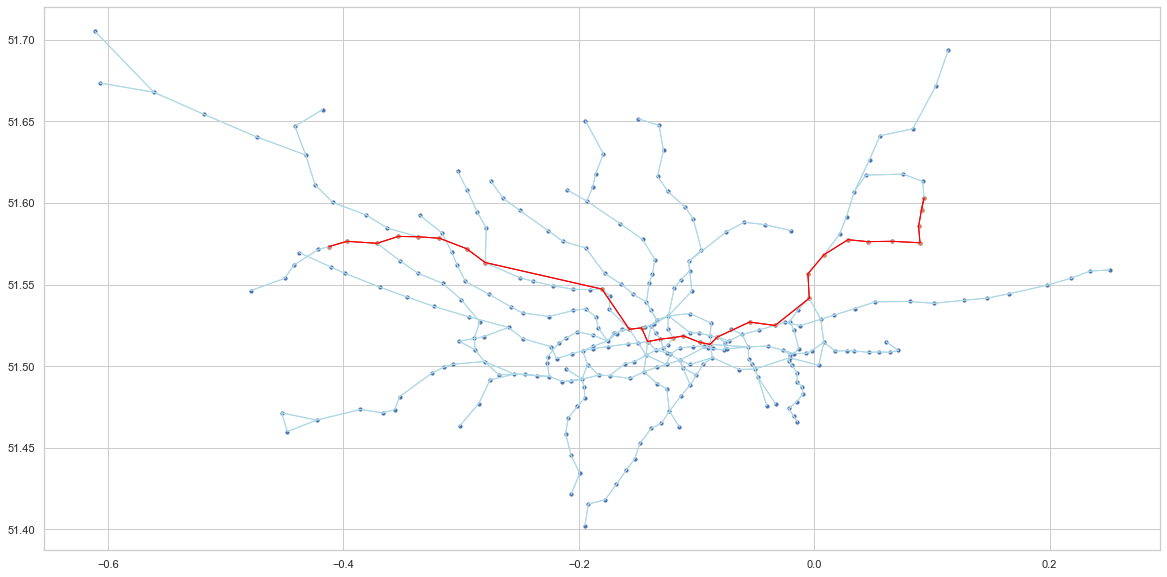

In [22]:
# Construct graph with nodes used for the shortest path
# for visualization purposes
tube_route = Graph()

# Create nodes
for i, node in enumerate(found_path):
    # Create nodes without edges
    cleared_node = GraphNode(name=node.name, x=node.x, y=node.y)
    tube_route.nodes.append(cleared_node)

# Create edges for every node
for i in range(len(tube_route.nodes)-1):
    tube_route.nodes[i].neighbor_nodes.append(tube_route.nodes[i+1])
    tube_route.nodes[i+1].neighbor_nodes.append(tube_route.nodes[i])
tube_route.nodes[-1].neighbor_nodes.append(tube_route.nodes[-2])    


# Plot results
tube_graph.plot()
tube_route.plot(color='red')

### Of the process

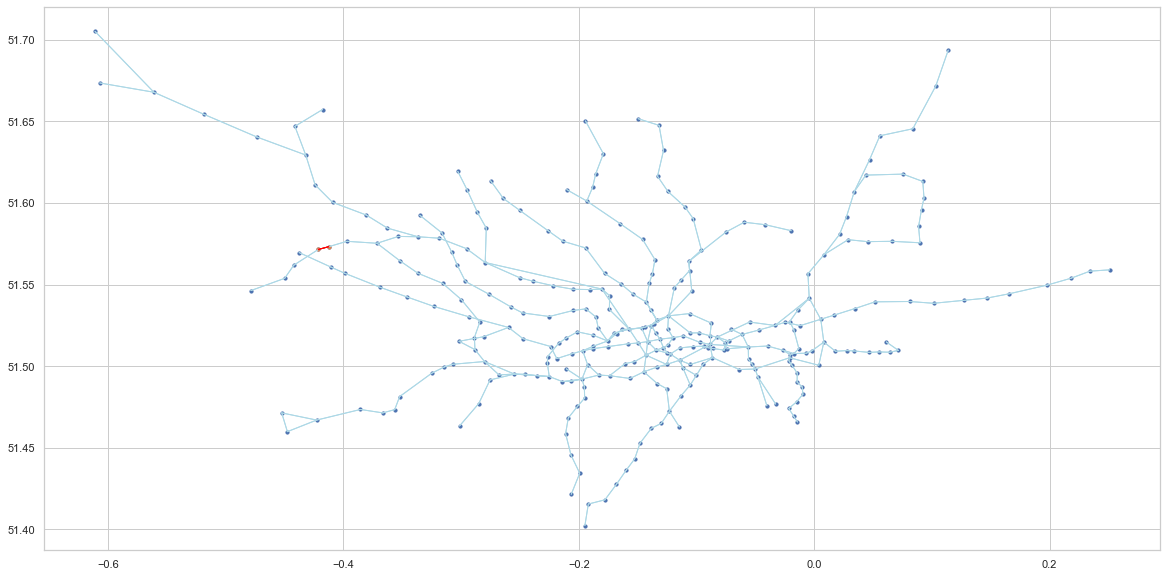

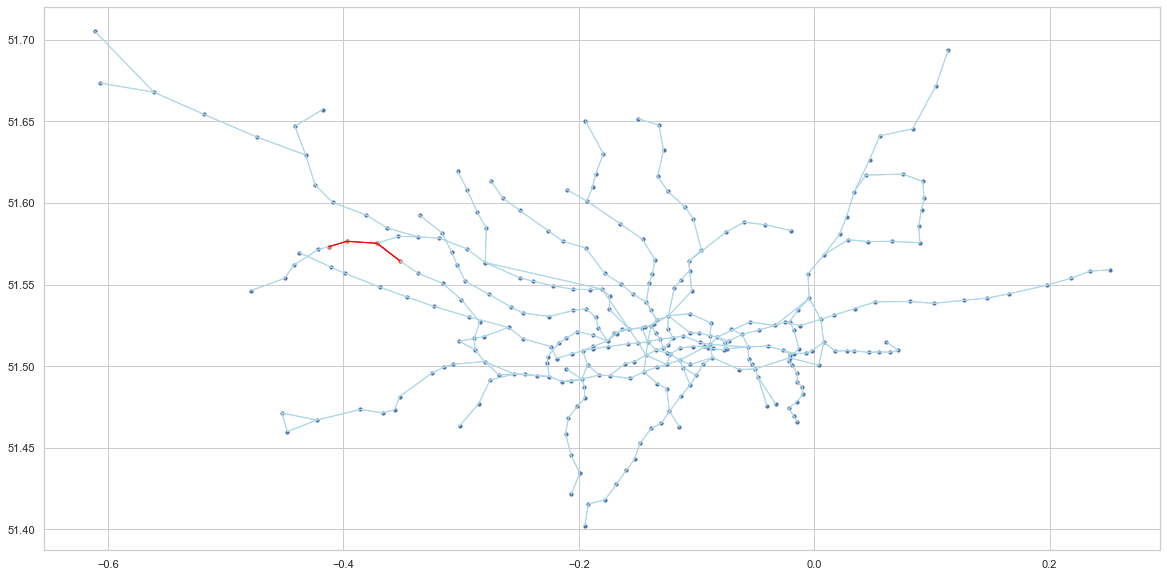

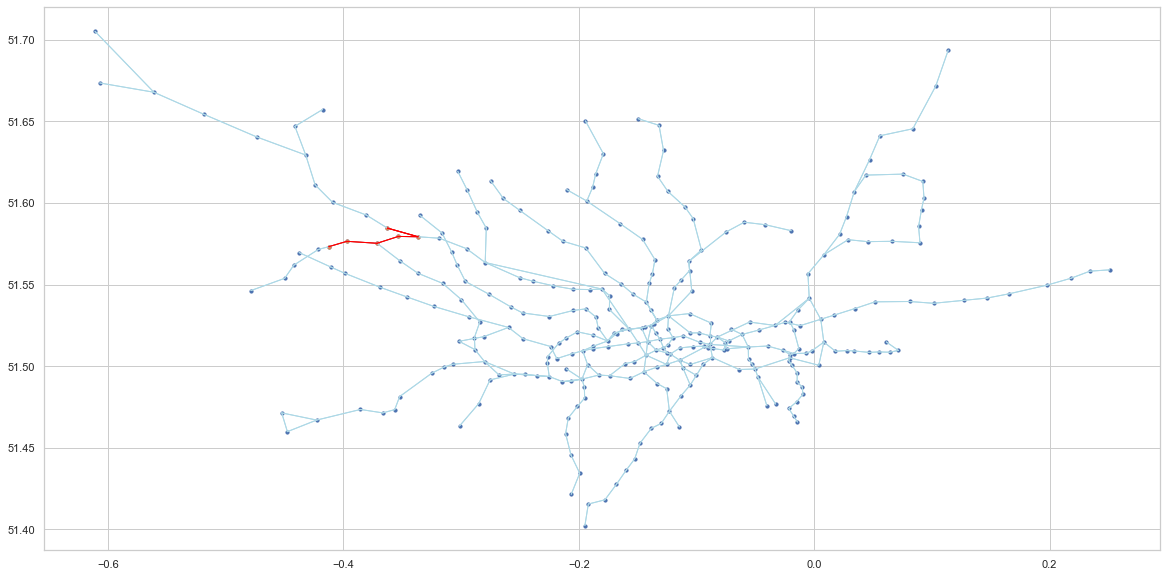

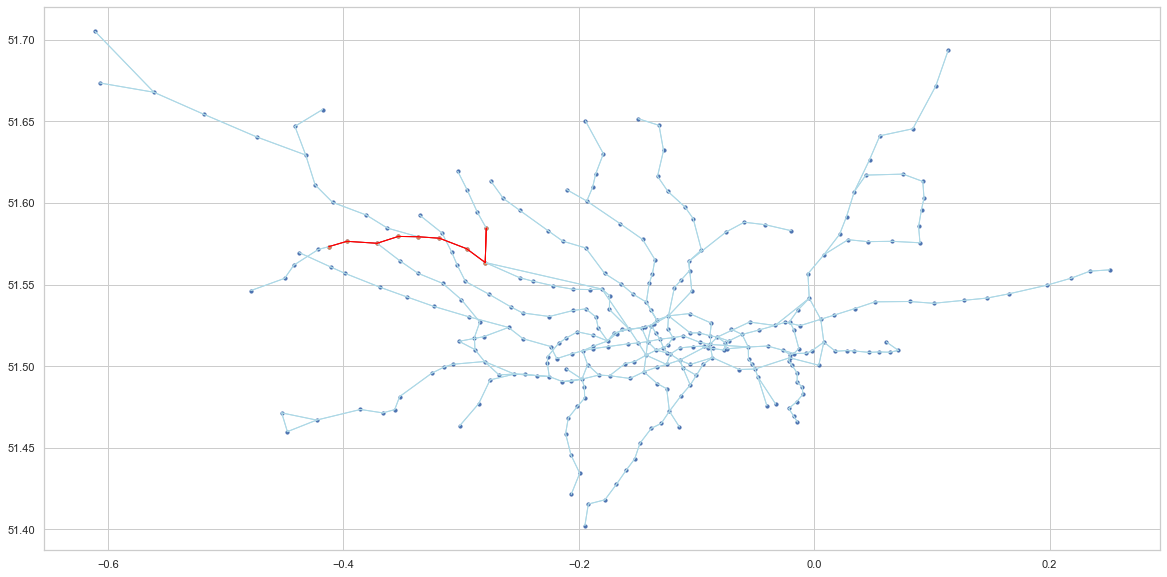

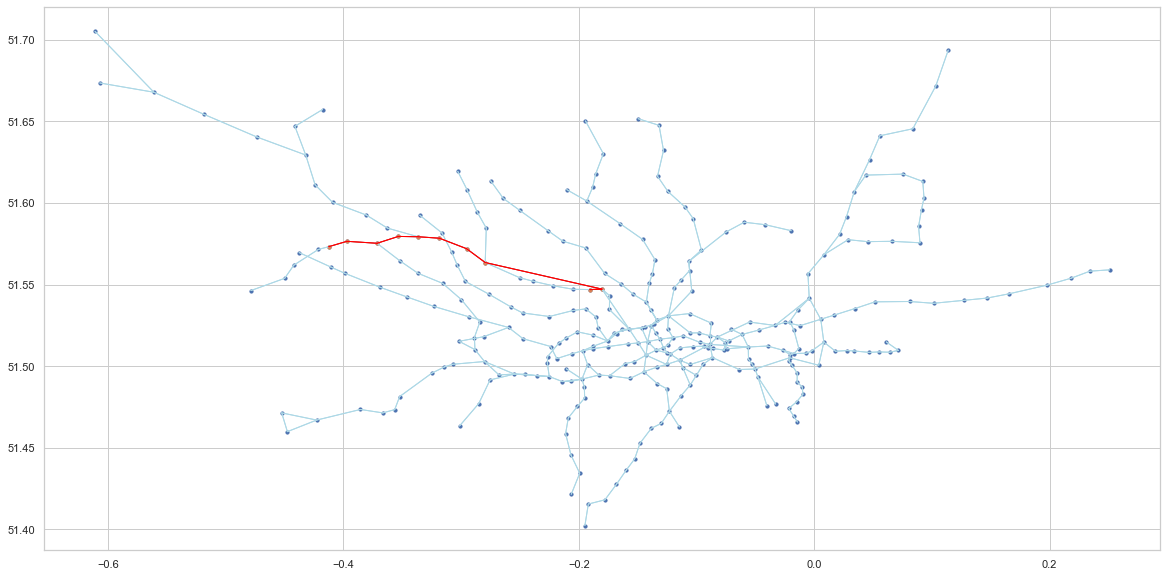

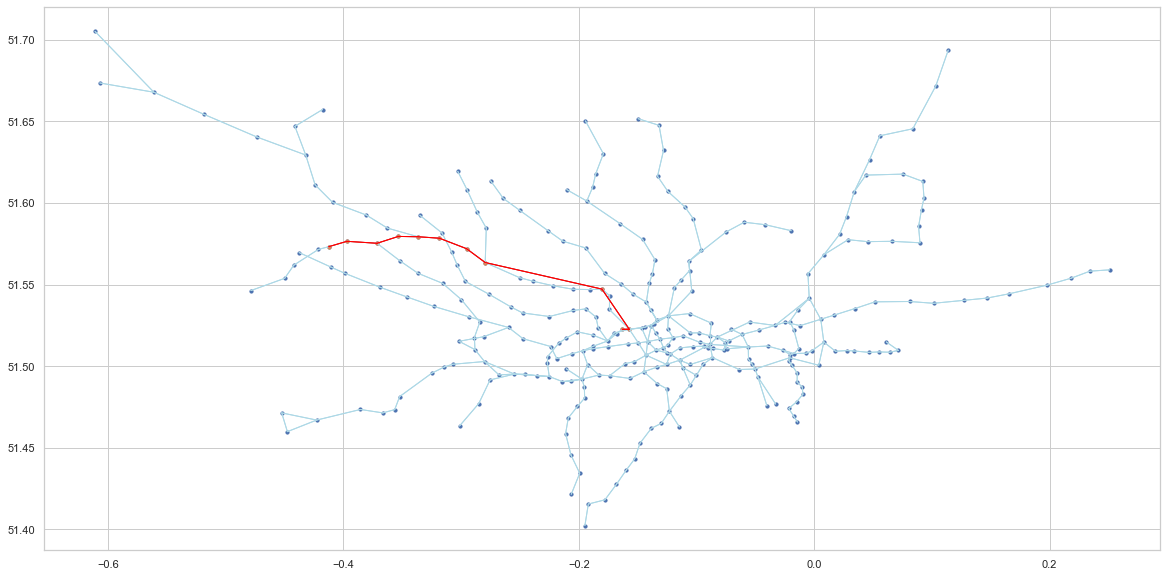

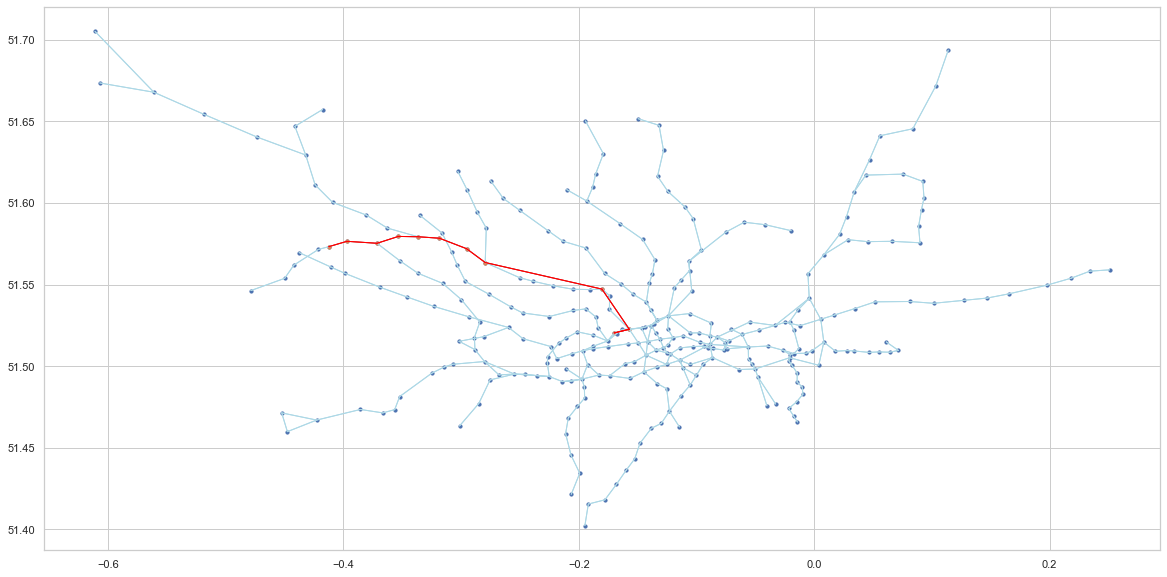

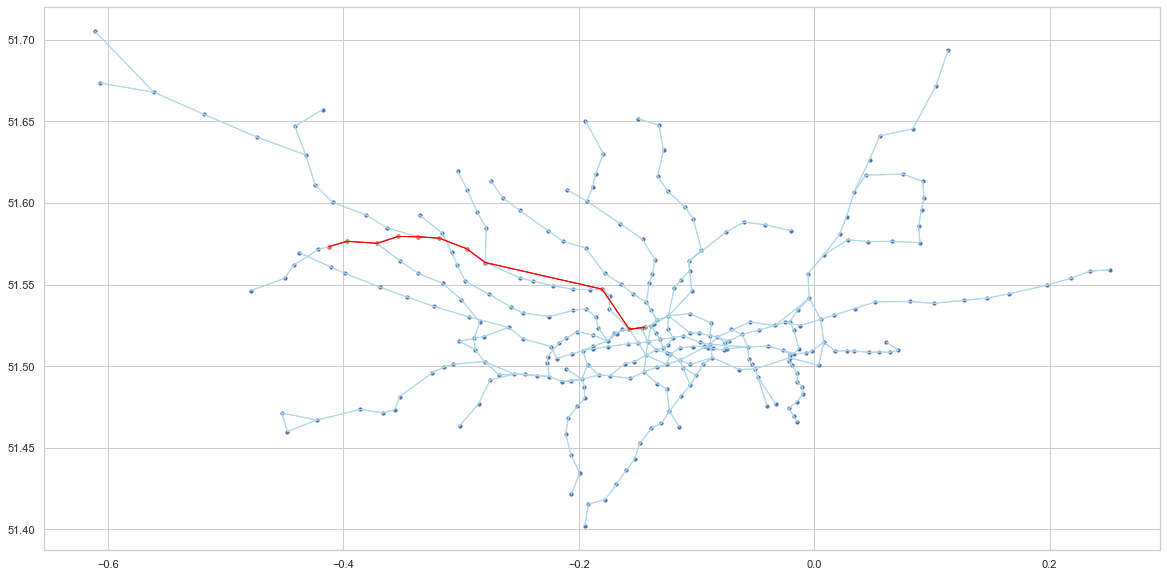

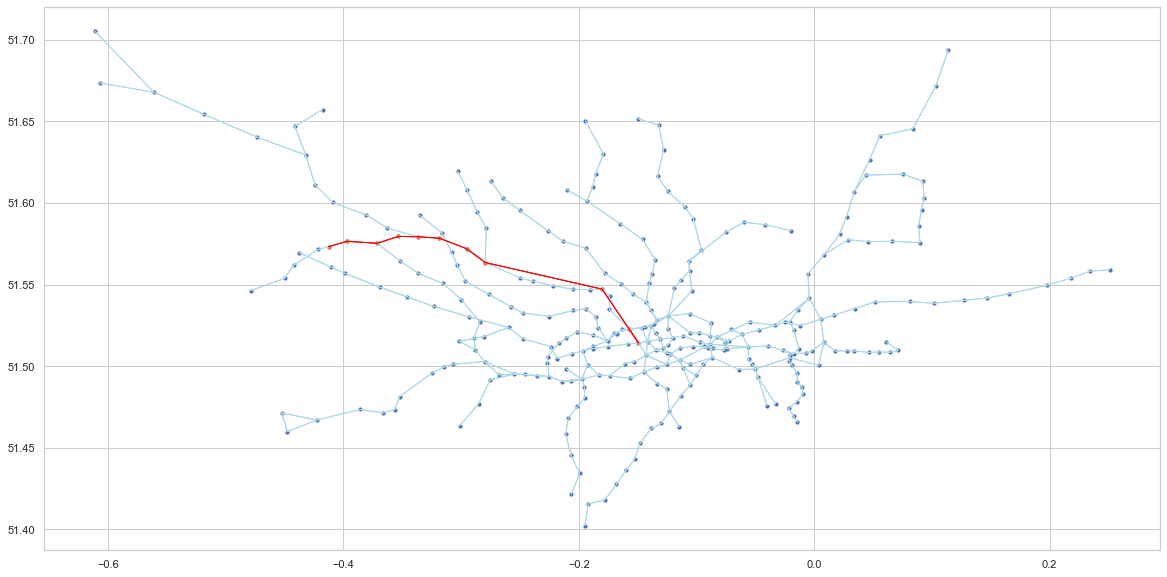

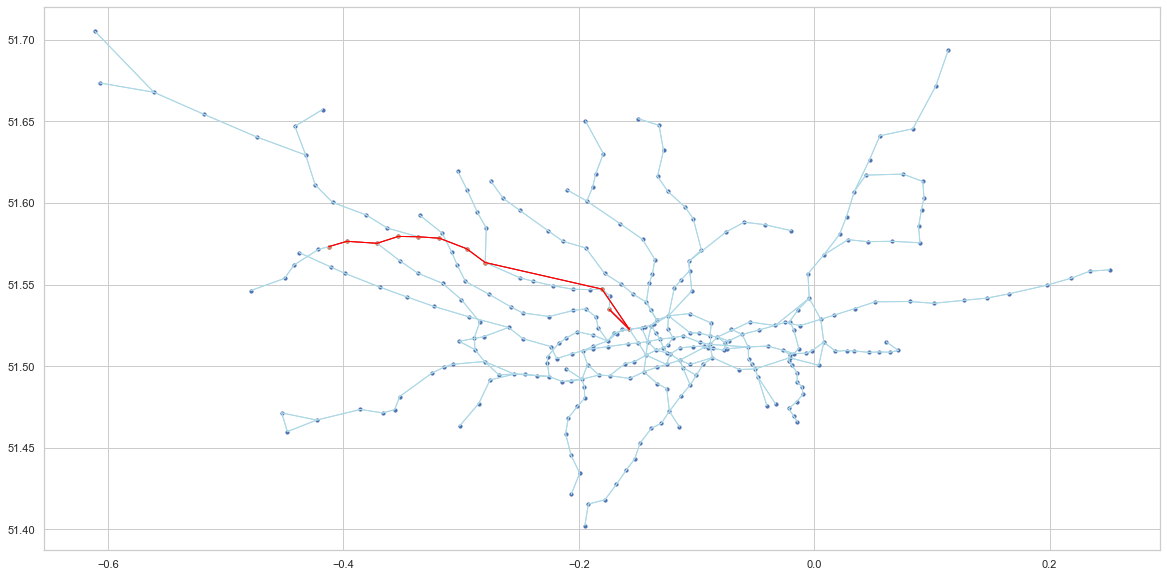

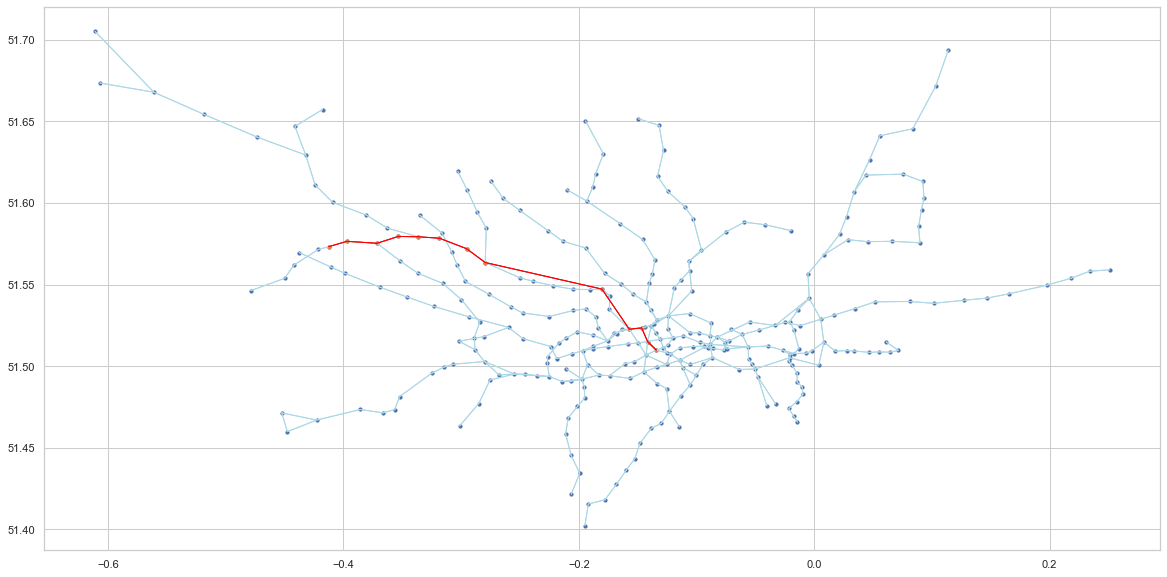

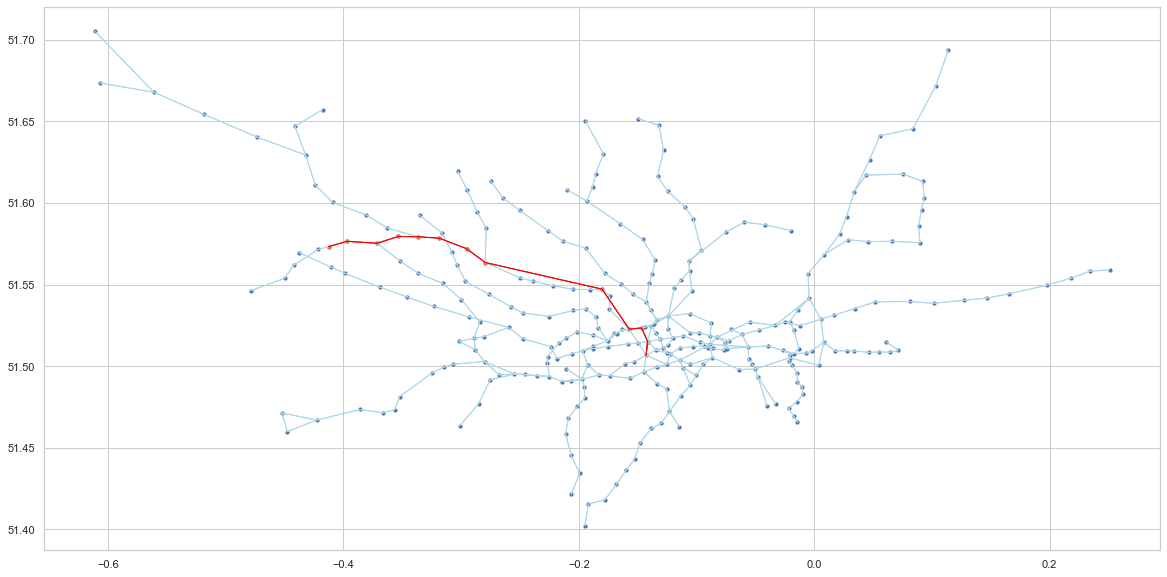

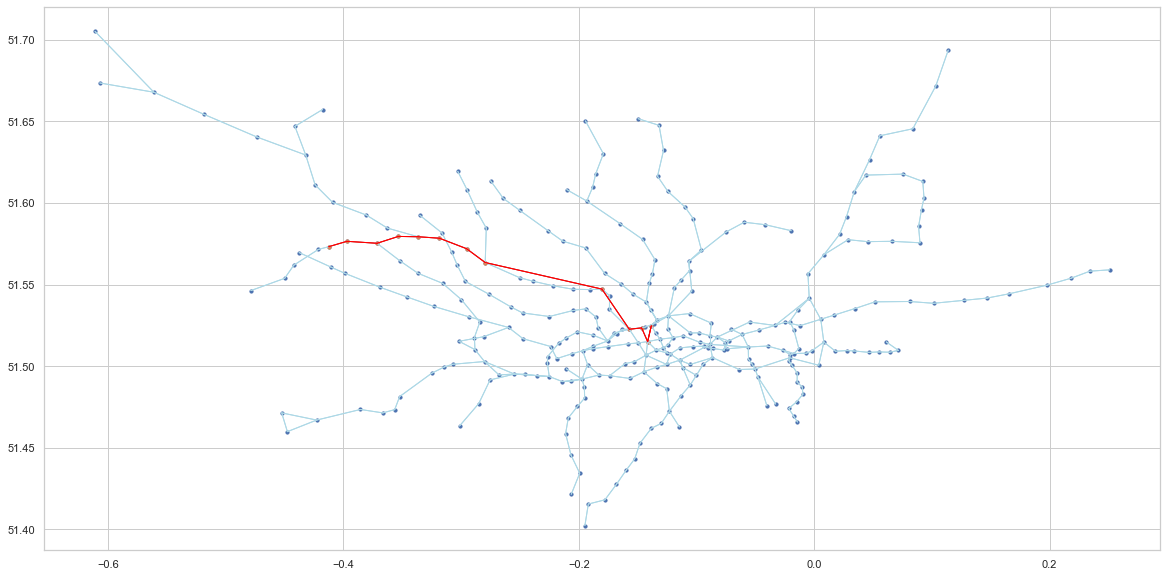

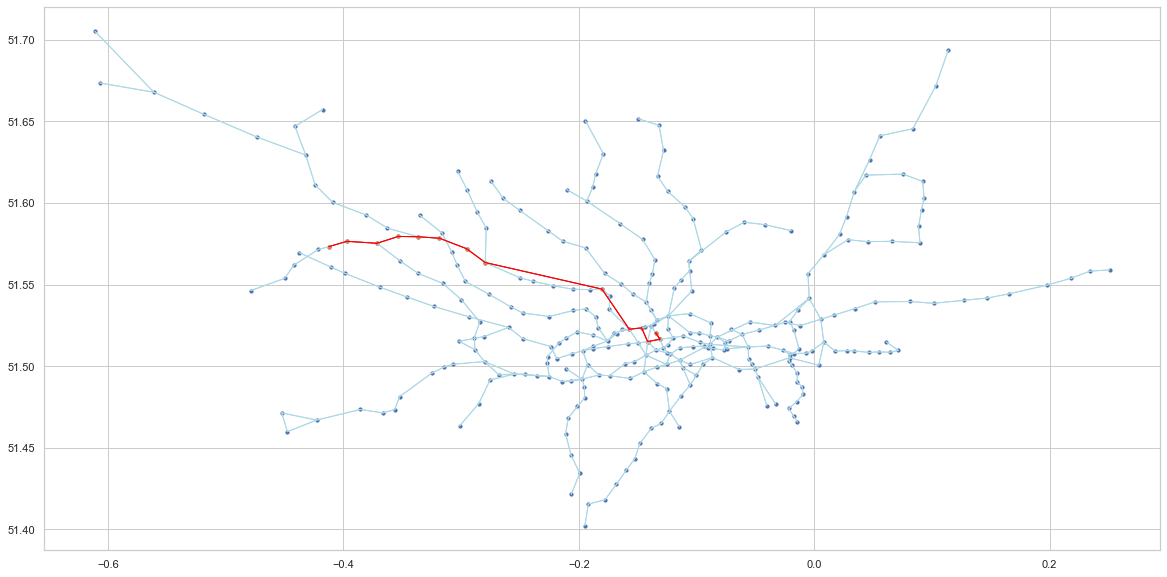

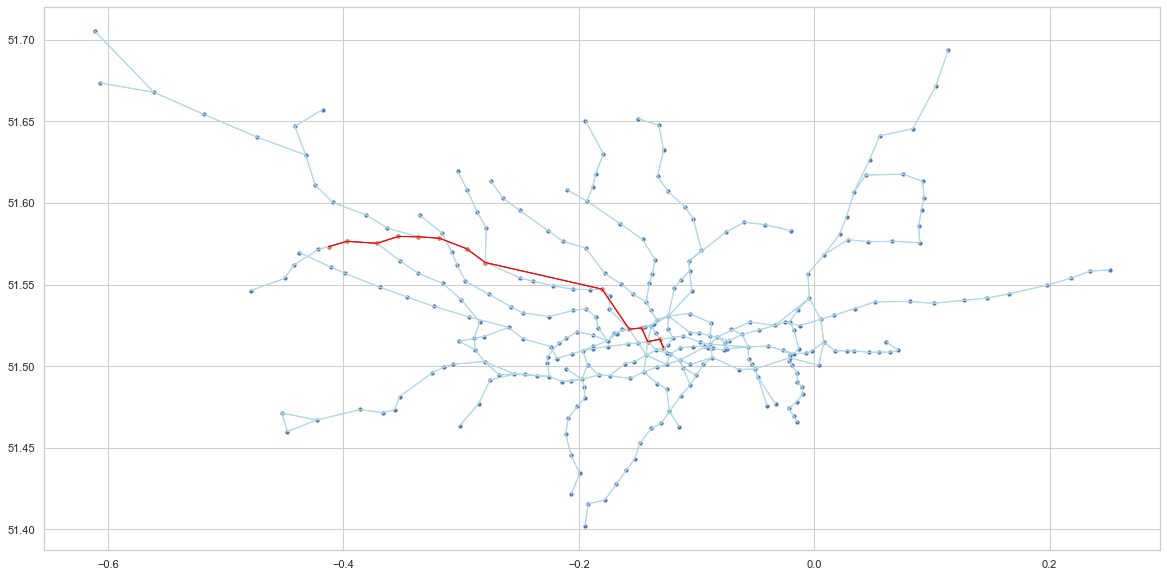

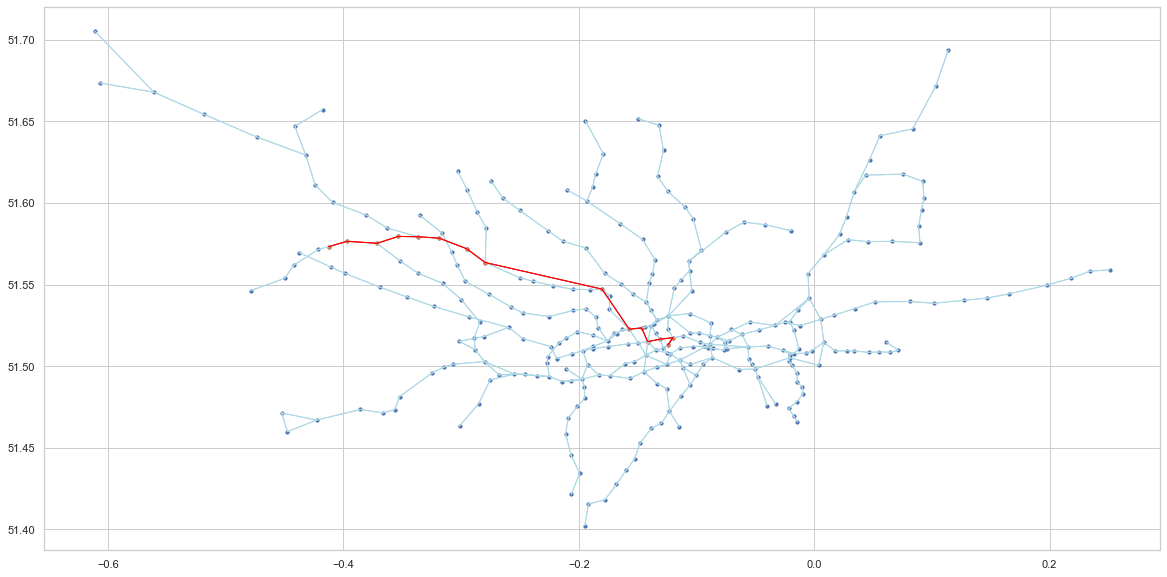

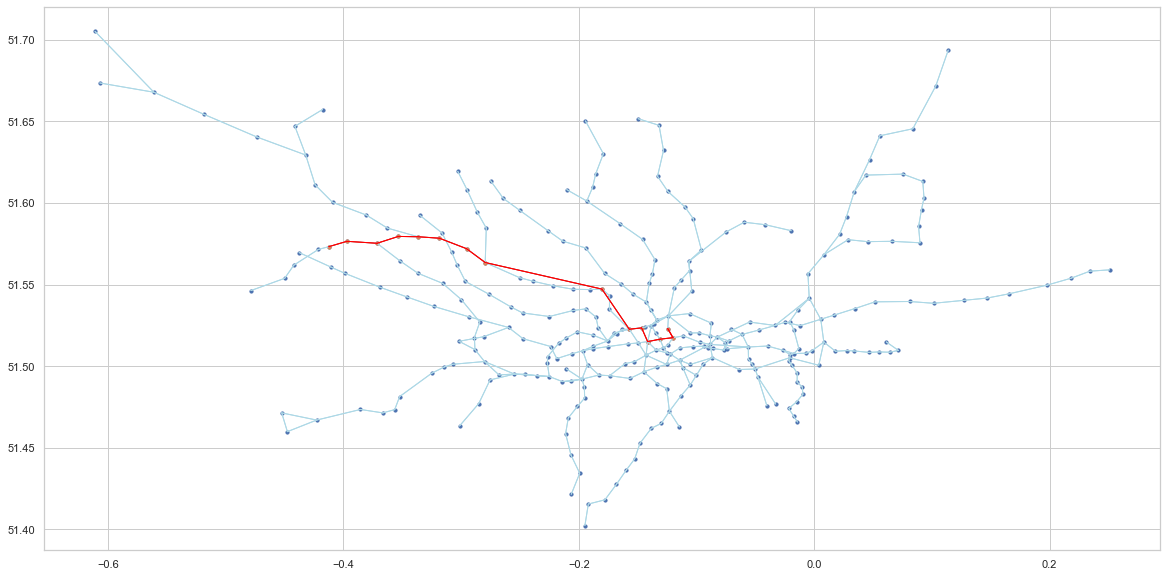

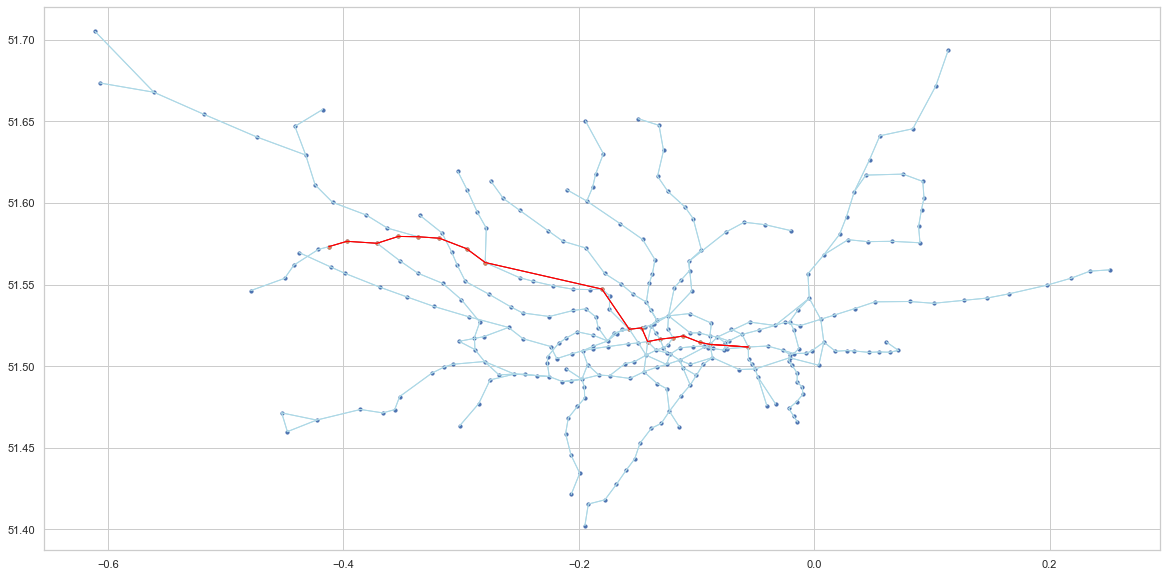

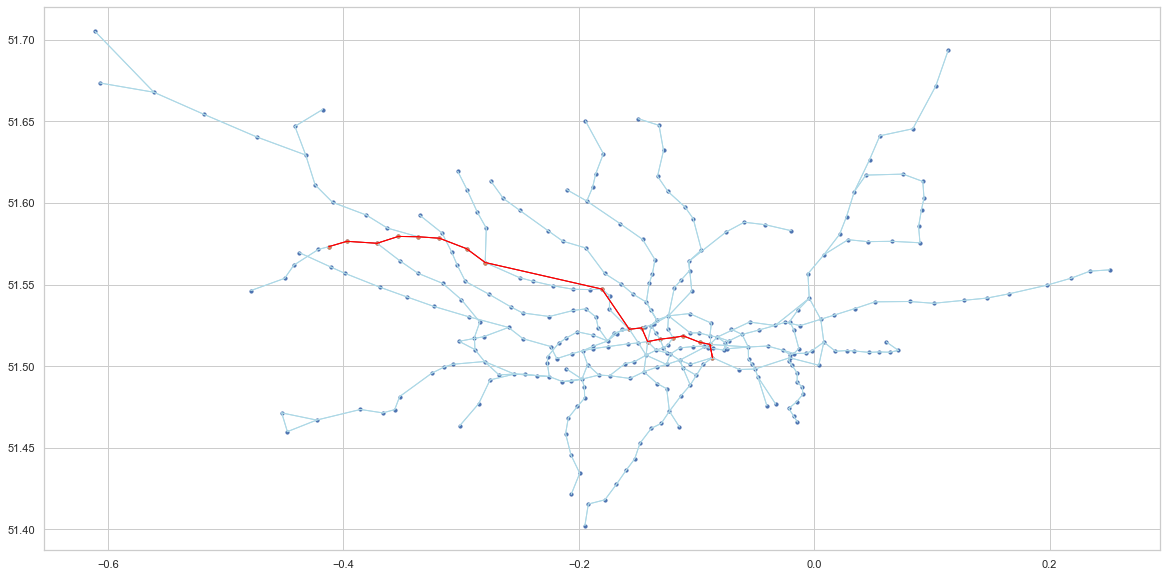

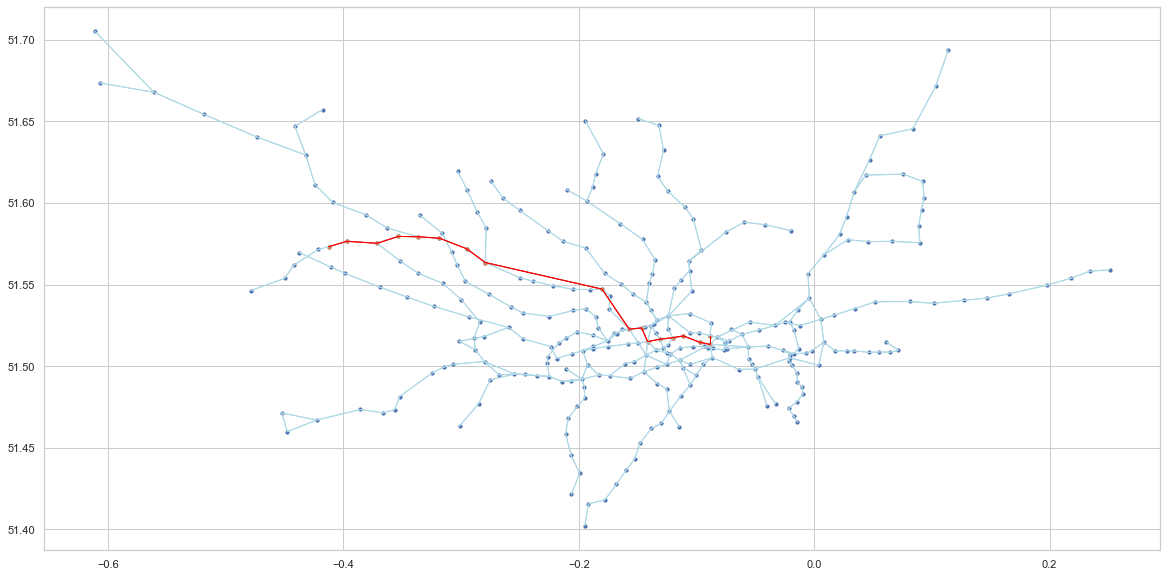

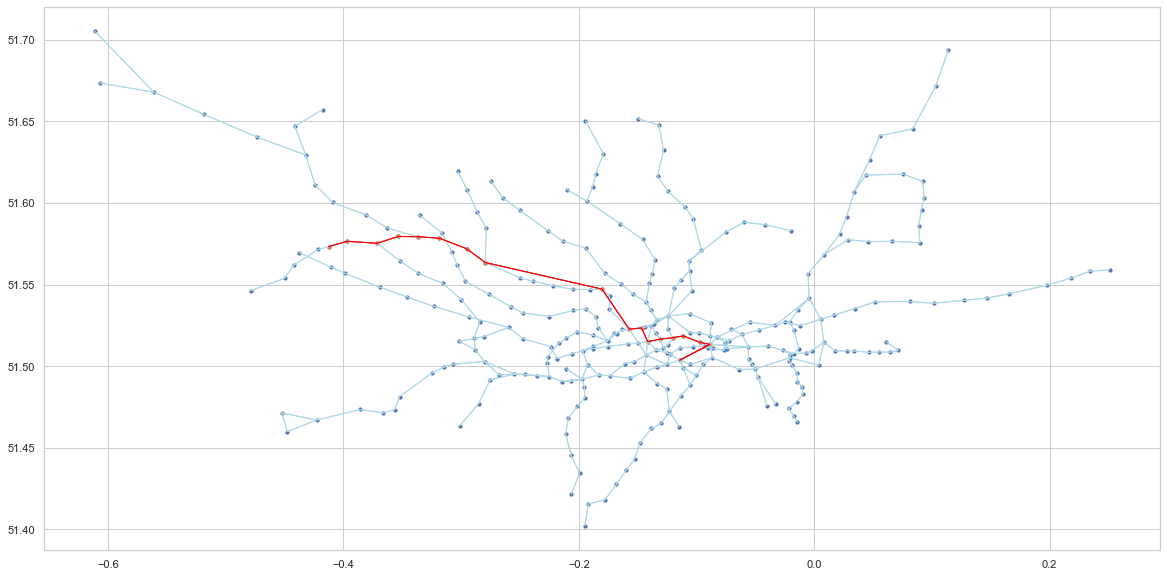

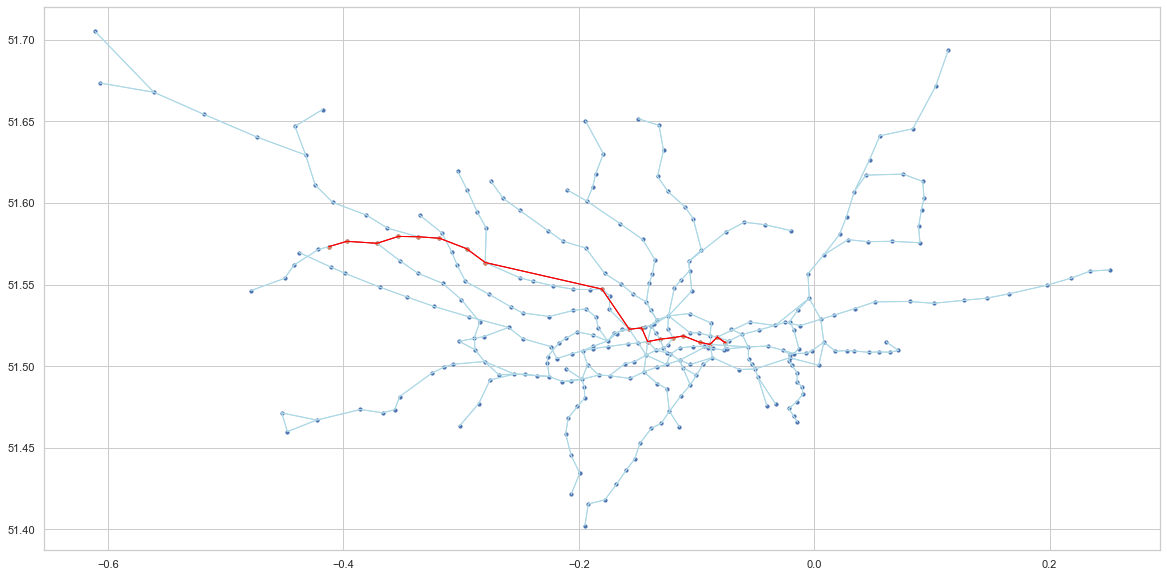

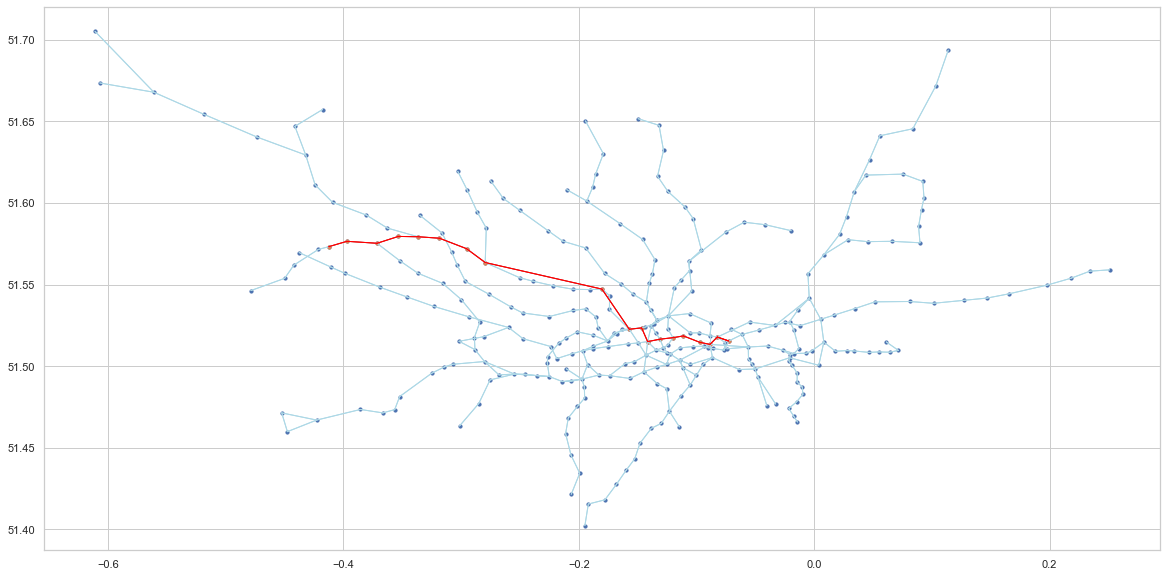

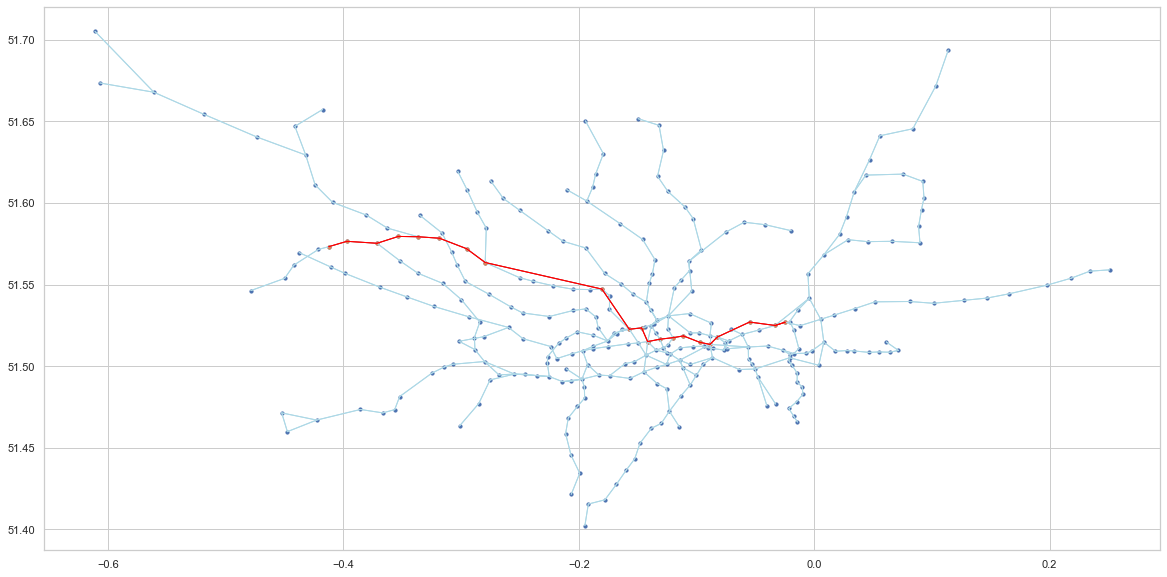

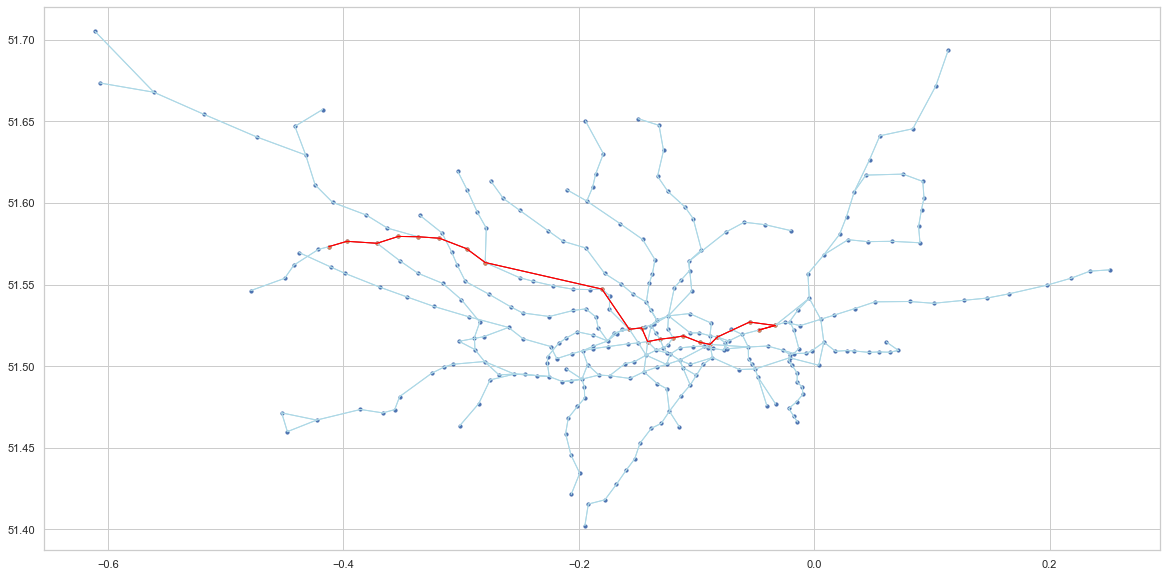

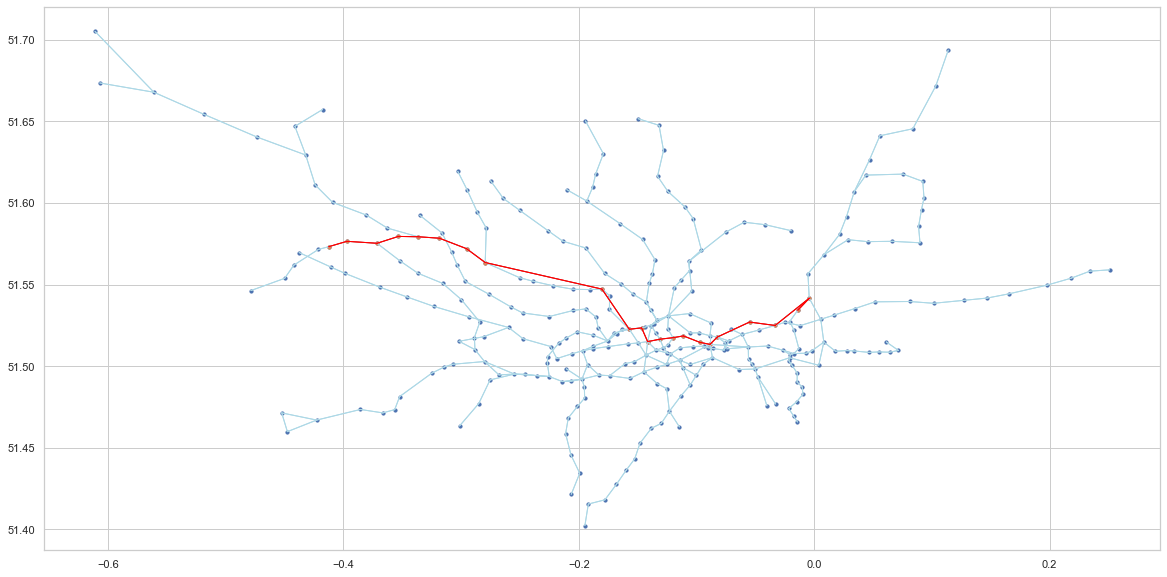

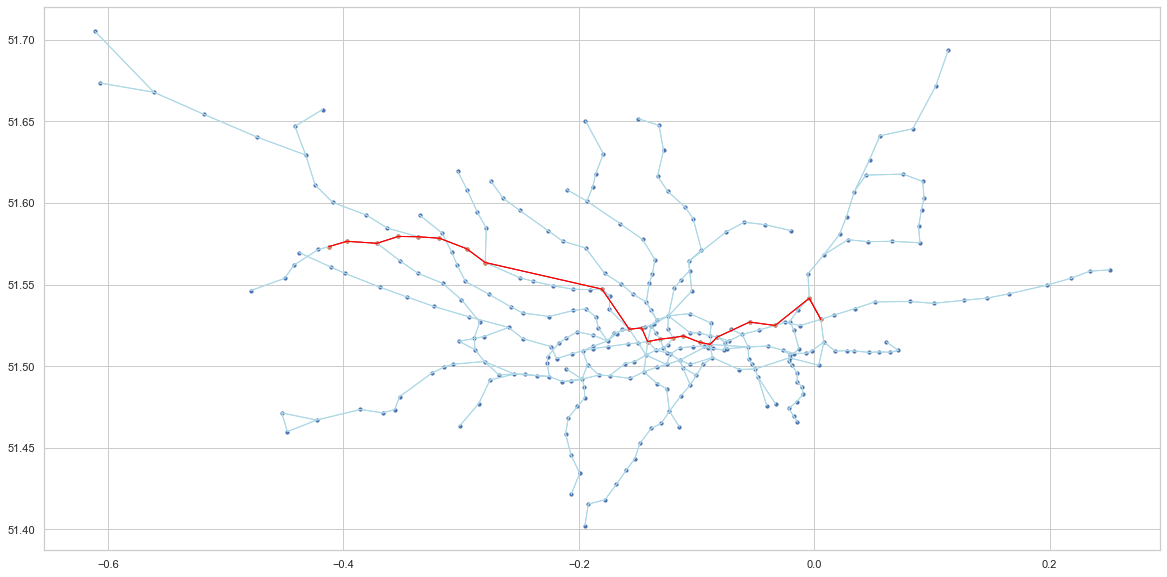

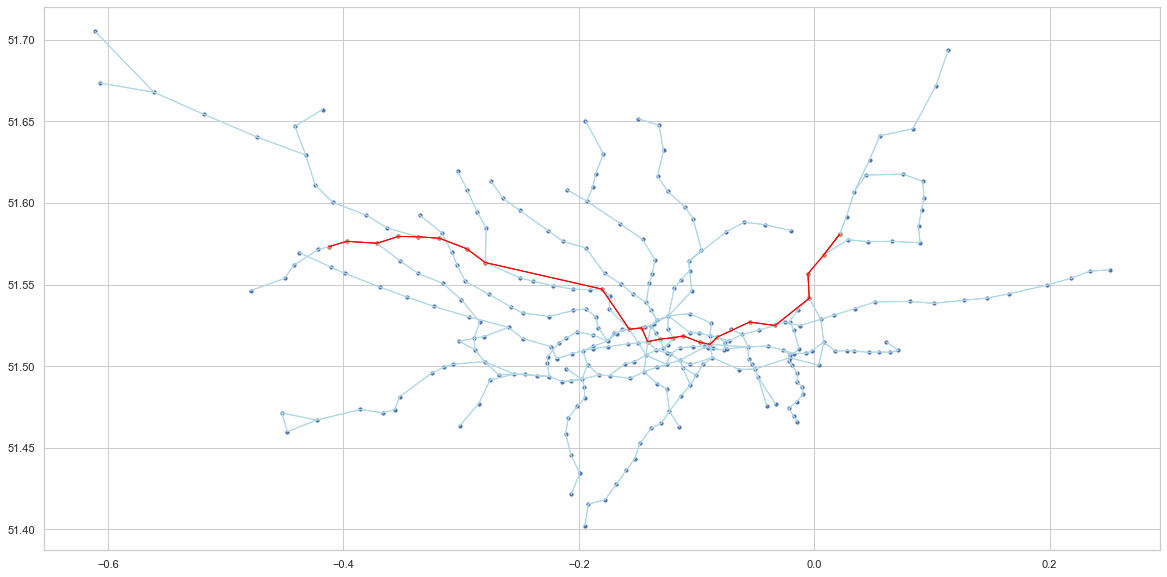

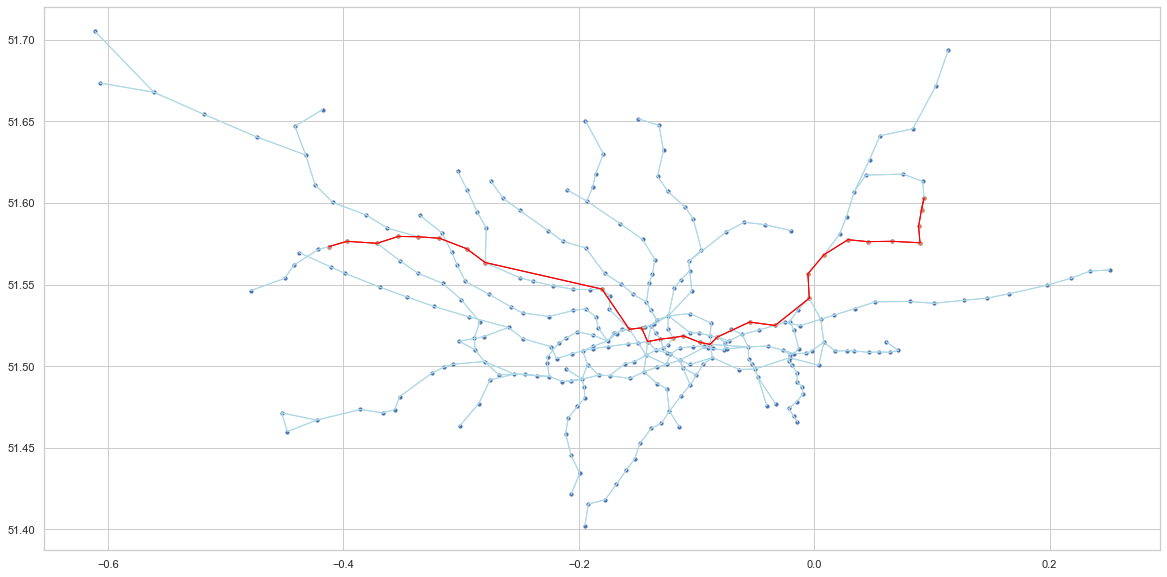

In [23]:
# Check what other pathes were considered at some point (long runtime!)
for path in open_path_list:
    # Construct graph with nodes used for the shortest path
    # for visualization purposes
    considered_tube_route = Graph()

    # Create nodes
    for i, node in enumerate(path):
        # Create nodes wothout edges
        cleared_node = GraphNode(name=node.name, x=node.x, y=node.y)
        considered_tube_route.nodes.append(cleared_node)

    # Create edges for every node
    for i in range(len(considered_tube_route.nodes)-1):
        considered_tube_route.nodes[i].neighbor_nodes.append(considered_tube_route.nodes[i+1])
        considered_tube_route.nodes[i+1].neighbor_nodes.append(considered_tube_route.nodes[i])
    considered_tube_route.nodes[-1].neighbor_nodes.append(considered_tube_route.nodes[-2])    


    # Plot results
    tube_graph.plot()
    considered_tube_route.plot(color='red')
    plt.show()